In [2]:
# ERP Analysis Example
# roughly based on /svn/bbci/toolbox/demos/stdERPanalysis.m
import logging
logging.basicConfig(level=logging.WARNING)

In [6]:
from scipy import signal
fn=5000.
rt_b, rt_a = signal.butter(4, [12 / fn, 15 / fn], btype='band')

In [8]:
rt_a

array([  1.        ,  -7.99479031,  27.96382942, -55.89237895,
        69.82211422, -55.82359504,  27.89504445,  -7.96531027,
         0.99508648])

In [1]:
import sys
import easygui

import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import butter

sys.path.append("../../wyrm")  # real-time data analysis

from wyrm import processing as proc
from wyrm import plot
from wyrm import io

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
vhdrfile=easygui.fileopenbox(default='/media/ldrive/Lab_MichaelB/Johan/nf/rawdata/*.vhdr')

In [3]:
cnt = io.load_brain_vision_data(vhdrfile)

DEBUG:wyrm.io:Loading Brain Vision Data Exchange Header File
DEBUG:wyrm.io:Common Infos
DEBUG:wyrm.io:Binary Infos
DEBUG:wyrm.io:Channel Infos
DEBUG:wyrm.io:Loading EEG Data.
DEBUG:wyrm.io:Loading Marker.


In [10]:
import mne

In [14]:
raw_fromfile = mne.io.read_raw_brainvision(vhdrfile)

Extracting parameters from /media/ldrive/Lab_MichaelB/Johan/nf/rawdata/CH002/eeg/Robinson_Chall_2_2018-09-26_16-33-32_3.vhdr...
Setting channel info structure...
Currently, 1 trigger(s) will be dropped, such as [Impedance]. Consider using ``event_id`` to parse triggers that do not follow the 'S###' pattern.


<ipython-input-14-3019e564edc7>:1: RuntimeWarning: Currently, 1 trigger(s) will be dropped, such as [Impedance]. Consider using ``event_id`` to parse triggers that do not follow the 'S###' pattern.
  raw_fromfile = mne.io.read_raw_brainvision(vhdrfile)


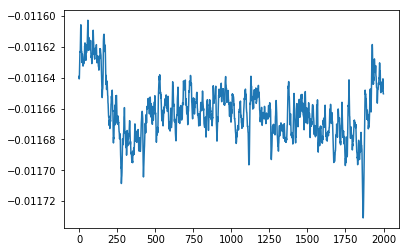

In [19]:
plt.plot(raw_fromfile[0,0:2000][0].transpose())

In [26]:
vhdrfile=easygui.fileopenbox(default='/media/ldrive/Lab_MichaelB/Johan/nf/rawdata/*.vhdr')

In [ ]:
raw_fromfile=mne.io.read_raw_cnt

array([ -9052.,  20521.,  -7403.,  27894.,  -7783.,  29839., -12380.,
        15524., -17562.,  -3645.])

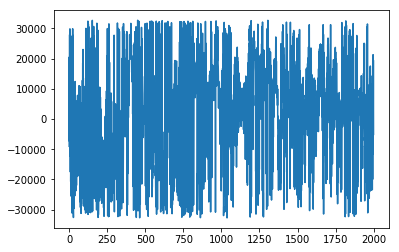

In [20]:
import matplotlib.pyplot as plt
plt.plot(cnt.data[0:2000,0])
cnt.data[0:10,0]

In [4]:
# remove unneeded channels
cnt = proc.remove_channels(cnt, ['EOG.*', 'Mas.*'])

In [33]:
butter?

Signature: butter(N, Wn, btype='low', analog=False, output='ba')
Docstring:
Butterworth digital and analog filter design.

Design an Nth-order digital or analog Butterworth filter and return
the filter coefficients.

Parameters
----------
N : int
    The order of the filter.
Wn : array_like
    A scalar or length-2 sequence giving the critical frequencies.
    For a Butterworth filter, this is the point at which the gain
    drops to 1/sqrt(2) that of the passband (the "-3 dB point").
    For digital filters, `Wn` is normalized from 0 to 1, where 1 is the
    Nyquist frequency, pi radians/sample.  (`Wn` is thus in
    half-cycles / sample.)
    For analog filters, `Wn` is an angular frequency (e.g. rad/s).
btype : {'lowpass', 'highpass', 'bandpass', 'bandstop'}, optional
    The type of filter.  Default is 'lowpass'.
analog : bool, optional
    When True, return an analog filter, otherwise a digital filter is
    returned.
output : {'ba', 'zpk', 'sos'}, optional
    Type of output:  nu

In [59]:
# bandpass filter the data
fn = cnt.fs / 2
b, a = butter(4, [2 / fn, 40 / fn], btype='band')
cnt = proc.lfilter(cnt, b, a)

In [6]:
# subsample to 100hz
cnt = proc.subsample(cnt, 100)

In [7]:
# TODO: rereferencing?

In [8]:
# epoch the data
mrk_def = {'std': ['S %2i' % i for i in range(2, 7)],
           'dev': ['S %2i' % i for i in range(12, 17)]
           }
epo = proc.segment_dat(cnt, mrk_def, [-150, 800])

In [9]:
# TODO: artifact rejection

In [10]:
# TODO: compute disciminability
# proc_r_square_signed

In [11]:
avg_epo = proc.calculate_classwise_average(epo)

In [12]:
for i, e in enumerate(avg_epo.class_names):
    plot.plot_channels(proc.select_epochs(avg_epo, [i]))
    
plt.legend(avg_epo.class_names)
plt.show()

In [13]:
plot.plot_channels(proc.select_epochs(epo, [100]))
plt.show()